<a href="https://colab.research.google.com/github/codeforgirls-sa/ds/blob/master/unit3/predictive-modeling-regression/demo_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz  # Visualization


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#About the dataste

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Dataset Naming
The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

Miscellaneous Details
-Origin
The origin of the boston housing data is Natural.
-Usage
This dataset may be used for Assessment.
-Number of Cases
The dataset contains a total of 506 cases.
-Order
The order of the cases is mysterious.
-Variables
There are 14 attributes in each case of the dataset. They are:


CRIM - per capita crime rate by town  

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.


INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)


NOX - nitric oxides concentration (parts per 10 million)  

RM - average number of rooms per dwelling  

AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  

RAD - index of accessibility to radial highways  

TAX - full-value property-tax rate per $10,000


PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town


LSTAT - % lower status of the population


MEDV - Median value of owner-occupied homes in $1000's


In [2]:
!wget https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/predictive-modeling-regression/Boston.csv
dataset = pd.read_csv('Boston.csv')
dataset.head()

--2020-07-07 13:09:34--  https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/predictive-modeling-regression/Boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37658 (37K) [text/plain]
Saving to: ‘Boston.csv’

Boston.csv          100%[===================>]  36.78K  --.-KB/s    in 0.02s   

2020-07-07 13:09:38 (1.48 MB/s) - ‘Boston.csv’ saved [37658/37658]



,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#EDA & Preprocessing

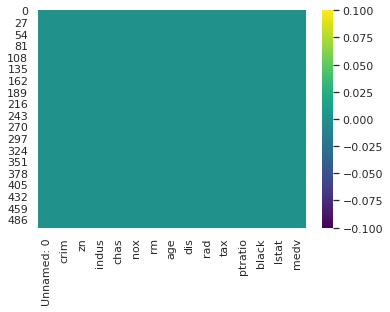

In [3]:
# check if there is any missing value
sns.set()
sns.heatmap(dataset.isnull(), cmap='viridis')

#Feature Engineering

In [4]:
# We need to remove 'Unnamed: 0'
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#Predictive Modeling

In [5]:
# split dataset in features and target variable
features = dataset.iloc[:, 5:6].values
target = dataset.iloc[:, 13].values


# Split dataset into training set and test set 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

# Create Decision Tree Regressor object
clf = DecisionTreeRegressor(max_depth=3)

# Train Decision Tree Regressor
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


#Predictive Evaluation

In [6]:
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error (MSE):  35.80468497717444
Root Mean Squared Error (RMSE):  5.983701611642616


#Result Visualization

In [7]:
export_graphviz(clf, out_file='tree_regressor.dot',
                feature_names=["rm"], filled=True)


In [8]:
# dot -Tpng tree_regressor.dot -o tree_regressor.png => save it as png
# Samples = how many sample in the node
# Value =
!dot -Tpng tree_regressor.dot -o tree_regressor.png

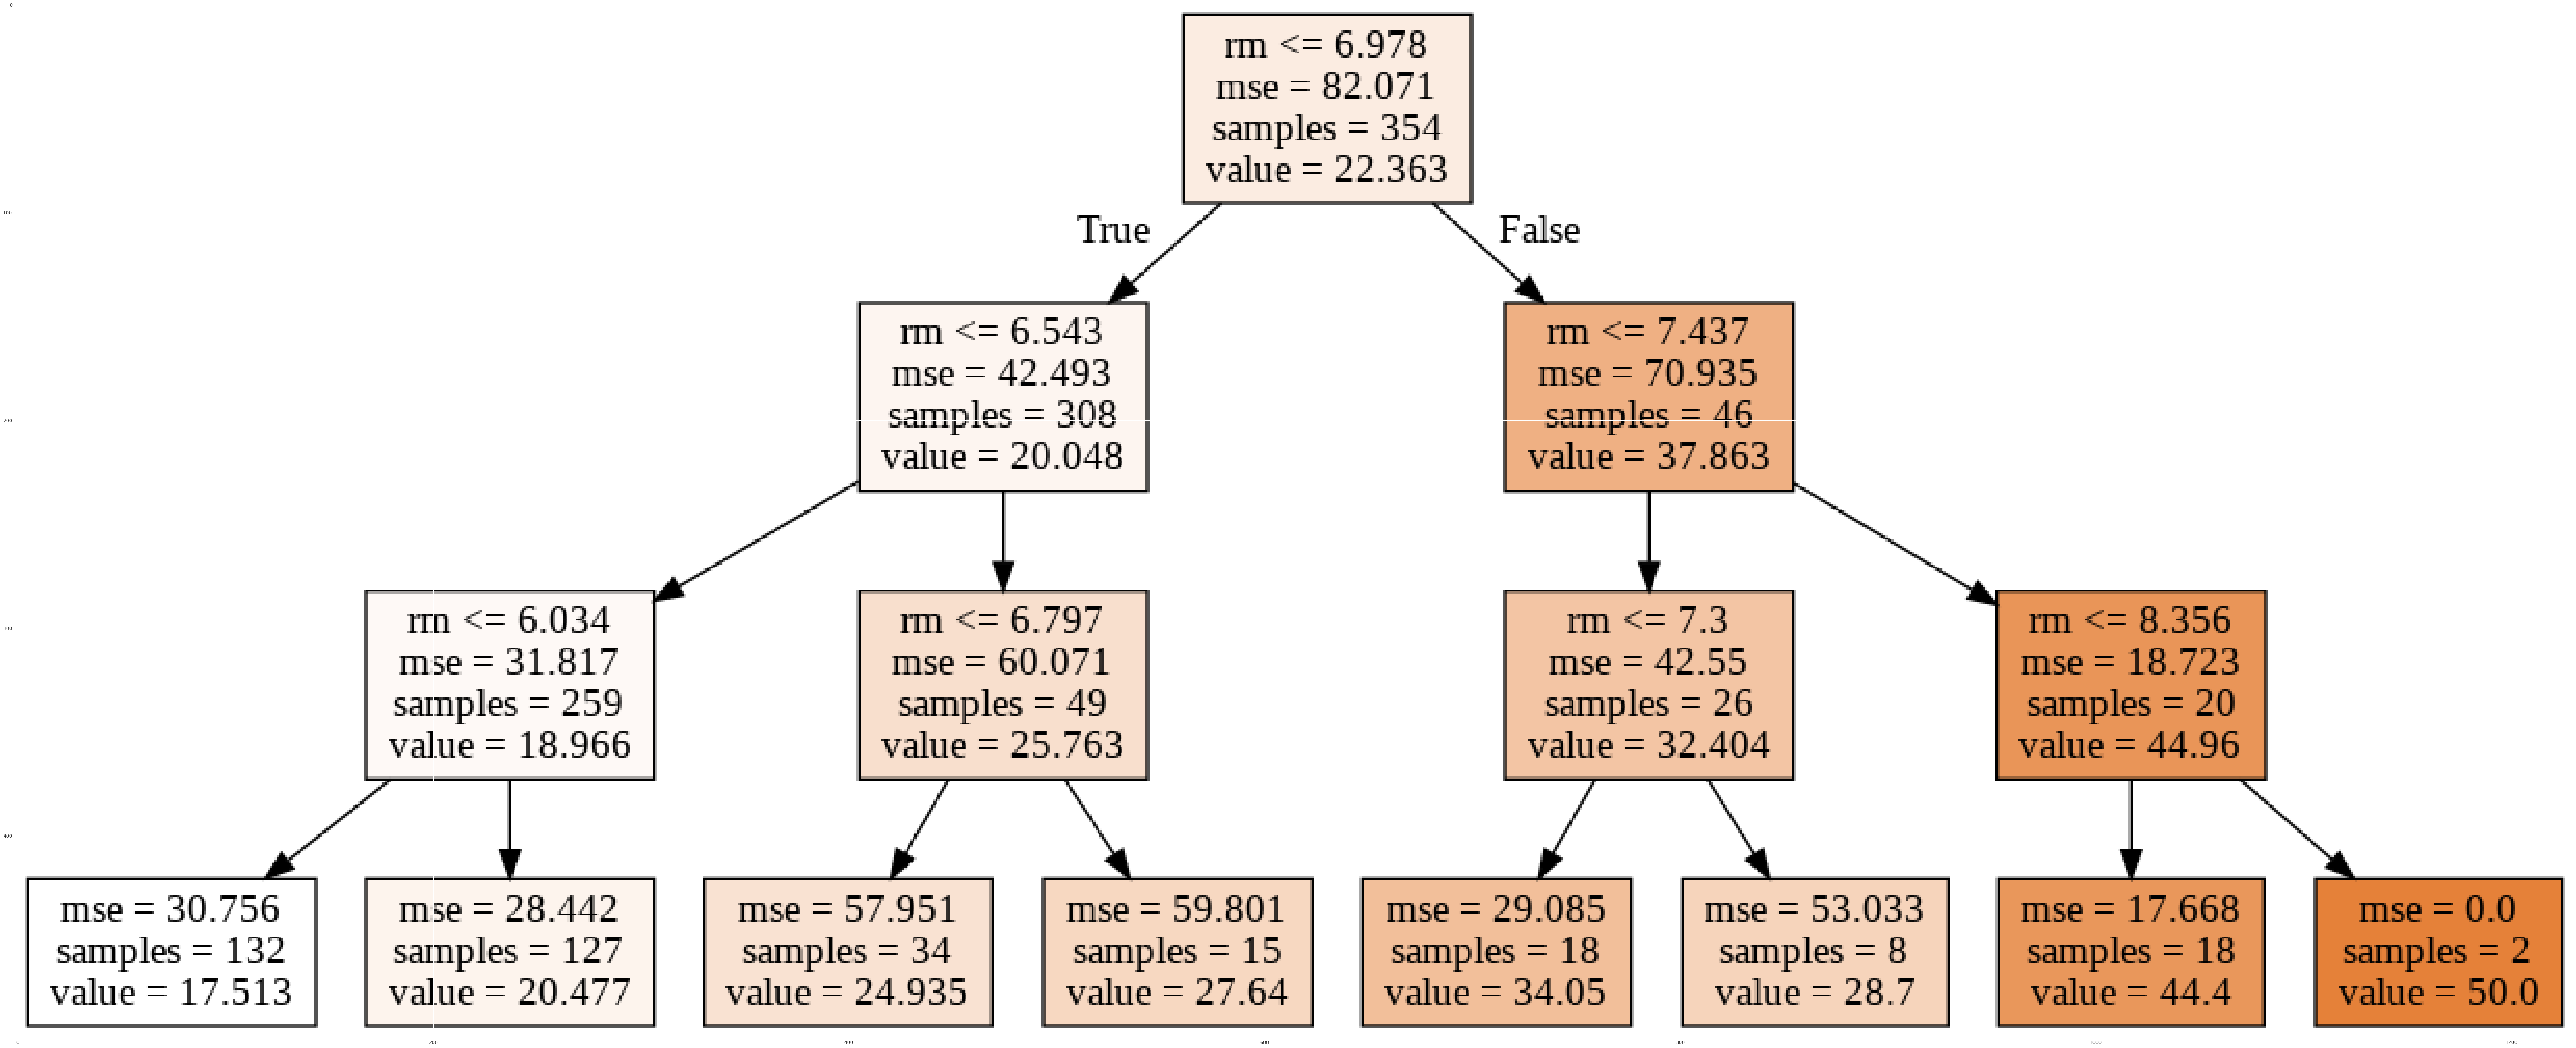

In [9]:
plt.figure(figsize=(104,104))
img = plt.imread('tree_regressor.png')
plt.imshow(img)